In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
datasetname='2nd-CuSn-MFF-FE-HCOOHCO.csv'
strlist = datasetname.split('.') 
savename=strlist[0]
dataset = pd.read_csv(datasetname)
print(dataset.head())
col = dataset.columns.values.tolist()
headers =col[0:-1]
features = np.array(dataset[headers])
labels = dataset['FEHCOOH/CO']

   CCN  C=O  CCC  CCC[C@@H](C)N  CO  C[C@H](N)C(=O)O  CN  CCCCN  CC(=O)O  \
0    3    1    4              1   1                1   2      2        1   
1    2    2    3              1   2                1   1      1        2   
2    0    0    0              0   0                0   0      0        0   
3    3    1    3              1   1                1   4      2        1   
4    0    2    0              0   2                0   0      0        0   

   CC[C@H](N)C(=O)O  ...  cc(C)nc(c)C  cc(C)n  ccc(nc)-c(c)n  cc(c)OC  \
0                 1  ...            0       0              0        0   
1                 1  ...            0       0              0        0   
2                 0  ...            0       0              0        0   
3                 1  ...            0       0              0        0   
4                 0  ...            0       0              0        0   

   ccc(cc)OC  COc  cc(O)ccn  Cc  cnc[nH]c  FEHCOOH/CO  
0          0    0         0   0         0       

In [2]:
plot_lr_name_1= 'Feature importance of SGD linear model in '+str(savename)+'.png'
plot_lr_name_2= 'Confusion Matrix of SGD linear model in '+str(savename)+'.png'
plot_lr_name_3= 'ROC curve of SGD linear model in '+str(savename)+'.png'
plot_lr_name_4= 'Feature importance2 of SGD linear model in '+str(savename)+'.png'
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

Coefficients: 
 [[-0.53667922  0.0888072   0.20282735  0.29911732  0.17923263  0.20357834
   0.0750148  -0.11180907  0.43131853  0.21608828  0.10919204  0.43131853
   0.34271172 -0.07722429 -0.70596097 -0.04344906  0.34271172 -0.18826981
   0.28052949  0.00206959  0.08229145  0.46521758 -0.26522757  0.55543086
   0.31553207 -0.16261466 -0.11186982 -0.03615728  0.26540111  0.45399914
  -0.01776199  0.26603442 -0.34251133  0.2061904   0.20357834 -0.09205169
  -0.24261939 -0.60137715 -0.25102502  0.34802485  0.16920119 -0.25102502
  -0.32483616  0.61062454 -0.90069733 -0.05341729 -0.00180707 -0.23140659
  -0.23140659 -0.2831589   0.19165498  0.21119526 -0.00425666 -0.27773546
   0.31932285 -0.45883108 -0.45883108  0.78591046 -0.25864033  0.3316106
  -0.07494746  0.         -0.07494746  0.07215045 -0.24780874 -0.24780874
  -0.24780874 -0.49561747 -0.32411603 -0.2734788 ]]
Mean squared error: 0.14
Coefficient of determination（R2 score）: 0.30
模型截距:
[0.21433857]


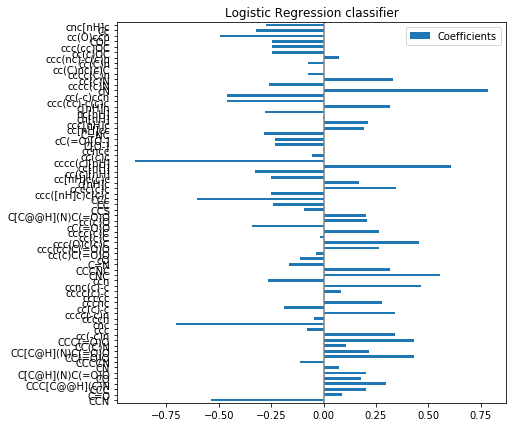

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=19)
# 逻辑斯蒂
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', verbose=0, n_jobs=-1)

lr.fit(X_train, y_train)
coef = np.array(lr.coef_).flatten()
#Linear regression
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination（R2 score）: %.2f'
      % r2_score(y_test, y_pred))
# 训练后模型截距
print('模型截距:')
print(lr.intercept_)
coefs = pd.DataFrame(
   coef,
    columns=['Coefficients'], index=headers
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Logistic Regression classifier')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

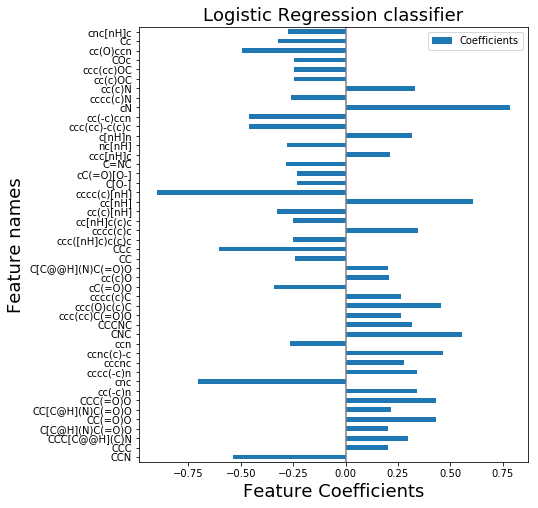

In [4]:
#coefs_copy=coefs.iloc[[idx for idx in range(len(coefs)) if coefs.iloc[idx].values>5e12 or coefs.iloc[idx].values <-5e12]]
coefs_copy=coefs.iloc[[idx for idx in range(len(coefs)) if coefs.iloc[idx].values>0.2 or coefs.iloc[idx].values <-0.2]]
coefs_copy.plot(kind='barh', figsize=(9, 8))
import matplotlib
plt.title('Logistic Regression classifier')
plt.axvline(x=0, color='.5')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,}
plt.xlabel('Feature Coefficients',font1)
plt.ylabel('Feature names',font1)
plt.title('Logistic Regression classifier',font1)
plt.subplots_adjust(left=.3)
plt.savefig(plot_lr_name_1, bbox_inches='tight',dpi=600)

In [5]:
importance = np.abs(lr.coef_)
print(importance)
importance= np.array(importance).flatten()

[[0.53667922 0.0888072  0.20282735 0.29911732 0.17923263 0.20357834
  0.0750148  0.11180907 0.43131853 0.21608828 0.10919204 0.43131853
  0.34271172 0.07722429 0.70596097 0.04344906 0.34271172 0.18826981
  0.28052949 0.00206959 0.08229145 0.46521758 0.26522757 0.55543086
  0.31553207 0.16261466 0.11186982 0.03615728 0.26540111 0.45399914
  0.01776199 0.26603442 0.34251133 0.2061904  0.20357834 0.09205169
  0.24261939 0.60137715 0.25102502 0.34802485 0.16920119 0.25102502
  0.32483616 0.61062454 0.90069733 0.05341729 0.00180707 0.23140659
  0.23140659 0.2831589  0.19165498 0.21119526 0.00425666 0.27773546
  0.31932285 0.45883108 0.45883108 0.78591046 0.25864033 0.3316106
  0.07494746 0.         0.07494746 0.07215045 0.24780874 0.24780874
  0.24780874 0.49561747 0.32411603 0.2734788 ]]


In [6]:
feature_numbers=7
idx_third = importance.argsort()[-feature_numbers]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:feature_numbers+1]
name_features = np.array(headers)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(lr, threshold=threshold)
sfm.fit(features, labels)
X_transform = sfm.transform(features)
n_features = sfm.transform(features).shape[1]

Selected features: ['cccc(c)[nH]' 'cN' 'cnc' 'cc[nH]' 'CCc' 'CNC' 'CCN' 'cc(O)ccn']


Coefficients: 
 [[-0.30708882  0.97205075 -0.8688895   0.61454843 -0.74498966  0.70407081
  -0.88807089  0.78440299]]
Mean squared error: 0.14
Coefficient of determination（R2 score）: 0.30
模型截距:
[0.27940329]


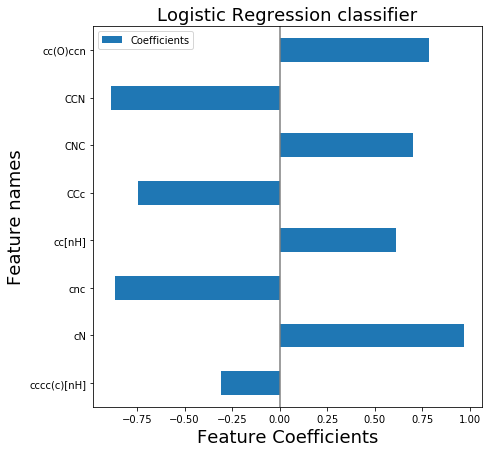

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, labels, test_size=0.15, random_state=19)
# 逻辑斯蒂
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', verbose=0, n_jobs=-1)

lr.fit(X_train, y_train)
coef = np.array(lr.coef_).flatten()
#Linear regression
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination（R2 score）: %.2f'
      % r2_score(y_test, y_pred))
# 训练后模型截距
print('模型截距:')
print(lr.intercept_)
coefs = pd.DataFrame(
   coef,
    columns=['Coefficients'], index=name_features
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.xlabel('Feature Coefficients',font1)
plt.ylabel('Feature names',font1)
plt.title('Logistic Regression classifier',font1)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig(plot_lr_name_4, bbox_inches='tight',dpi=600)

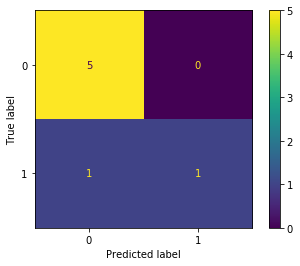

In [8]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)  # doctest: +SKIP
plt.savefig(plot_lr_name_2, bbox_inches='tight',dpi=600)
plt.show()  # doctest: +SKIP

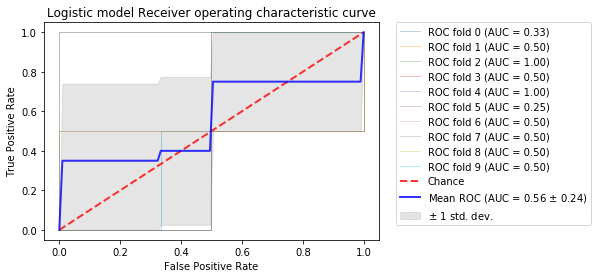

In [9]:
X=features
y=labels
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
n_splits=10
# #############################################################################
# Data IO and generation
n_samples, n_features = X.shape
from sklearn.model_selection import  StratifiedKFold
cv = StratifiedKFold(n_splits)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    lr.fit(X[train], y[train])
    viz = plot_roc_curve(lr, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Logistic model Receiver operating characteristic curve")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(plot_lr_name_3, bbox_inches='tight',dpi=600)
plt.show()
